In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

#Чтение и подготовка данных

In [11]:
train_df = pd.read_csv(r'../data/train.csv')
test_df = pd.read_csv(r'../data/test.csv') 

In [12]:
 train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [13]:
 test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [15]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [16]:
train_df.drop(['Id'],axis=1,inplace=True)
Id=test_df['Id']
test_df.drop(['Id'],axis=1,inplace=True) 

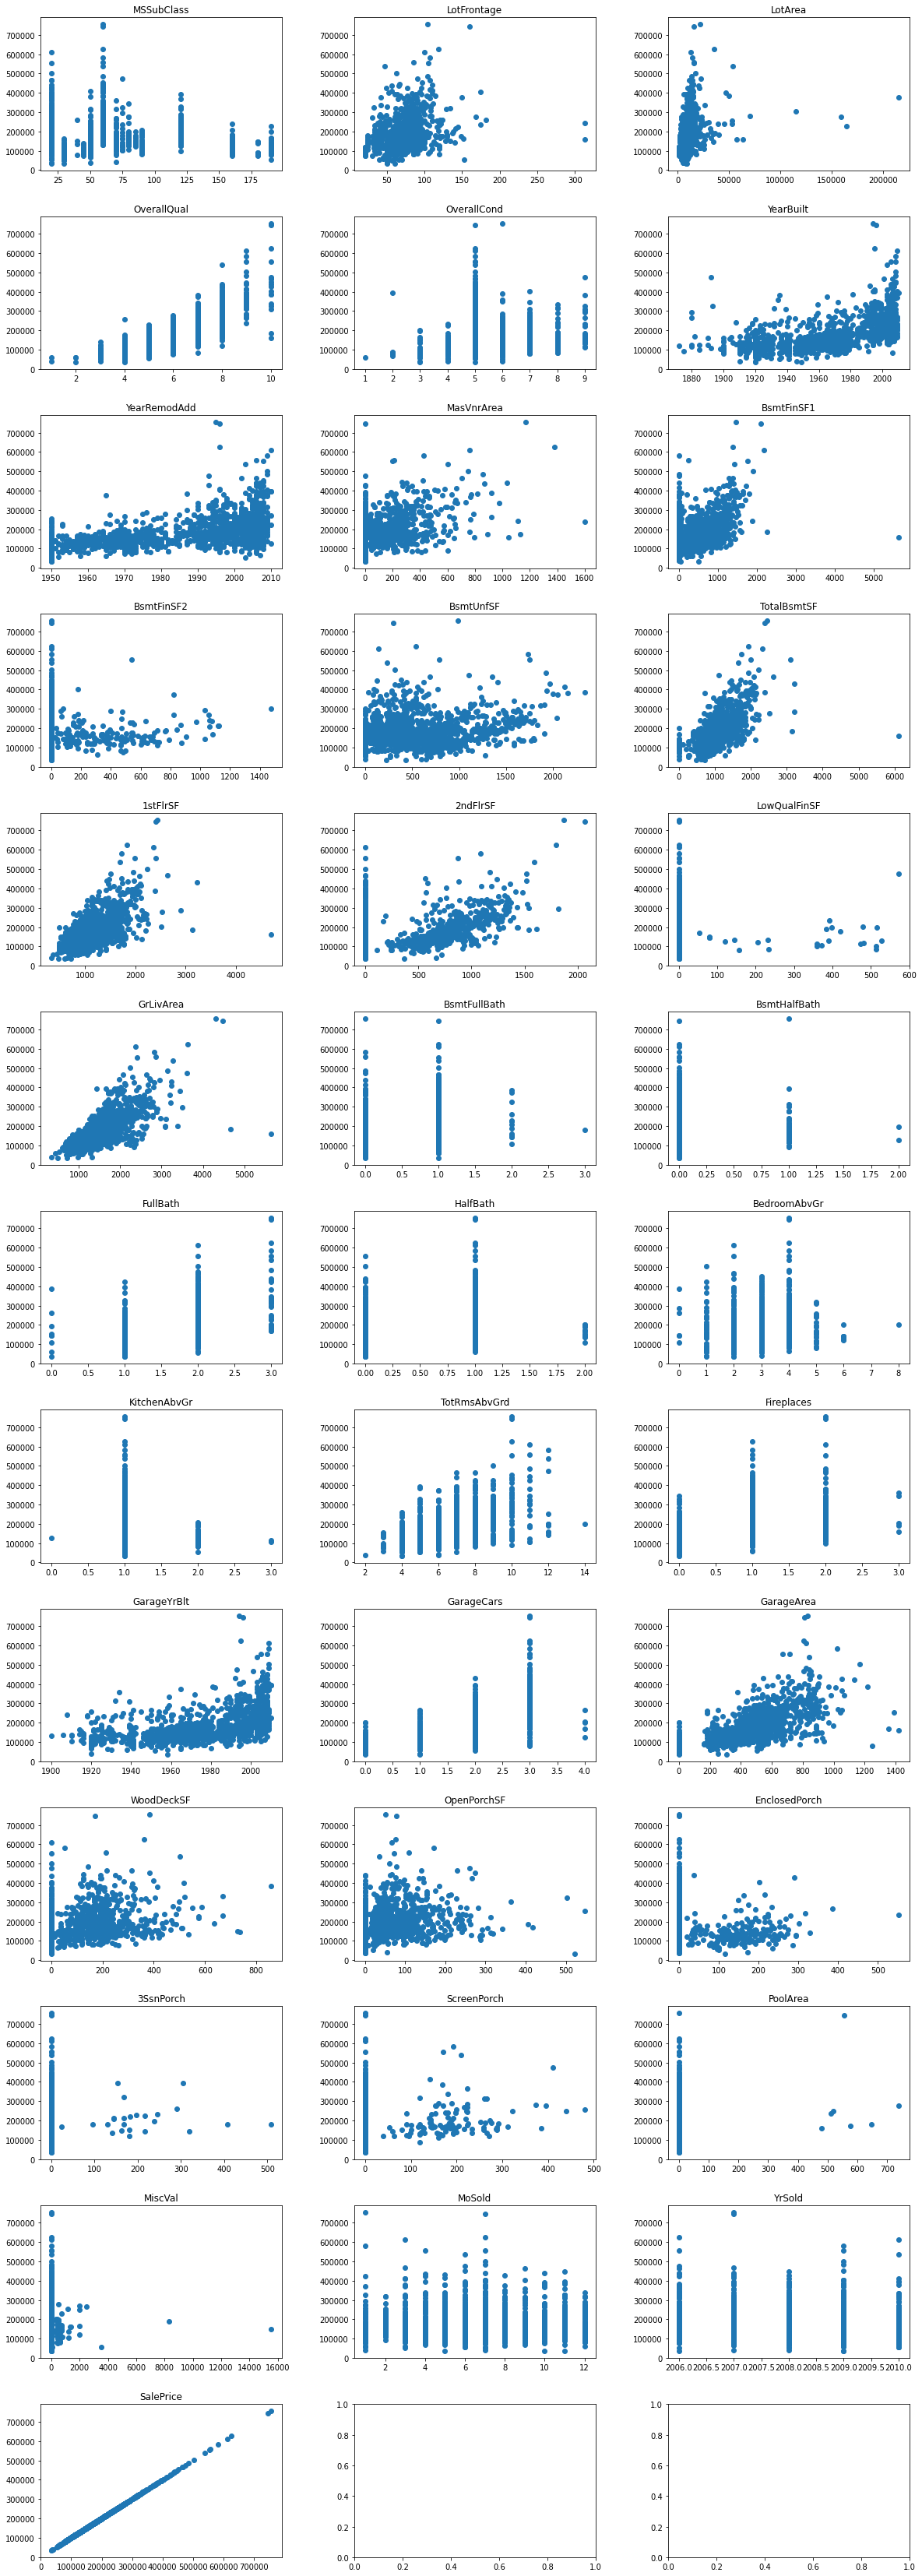

In [17]:
num=tuple(train_df.dtypes[train_df.dtypes!='object'].index)
row=3
fig, axes=plt.subplots(int(np.ceil(len(num)/row)), row, figsize=(20,60))

for i,n in zip(range(len(num)),num):
    axes[i//row,i%row].scatter(train_df.loc[:,n].values,train_df.loc[:,'SalePrice'].values)
    axes[i//row,i%row].set_title(n)
plt.subplots_adjust(wspace=0.3,hspace=0.3)
plt.show() 

In [18]:
anomalies=(
    (train_df.loc[:,'LotFrontage']>300)|
    (train_df.loc[:,'1stFlrSF']>4000)|
    ((train_df.loc[:,'LowQualFinSF']>400)&(train_df.loc[:,'SalePrice']>400000))|
    (train_df.loc[:,'BsmtFinSF1']>4000)|
    (train_df.loc[:,'TotalBsmtSF']>6000)|
    ((train_df.loc[:,'GrLivArea']>4000)&(train_df.loc[:,'SalePrice']<400000))|
    (train_df.loc[:,'LotArea']>100000)|
    (train_df.loc[:,'MiscVal']>10000))
    
    
anom_index=train_df[anomalies].index
train_df.drop(anom_index,inplace=True)

In [19]:
train_df.isna().sum().to_frame(name="nans").query("nans > 0")["nans"] 

LotFrontage      255
Alley           1360
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      689
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1445
Fence           1171
MiscFeature     1400
Name: nans, dtype: int64

In [20]:
test_df.isna().sum().to_frame(name="nans").query("nans > 0")["nans"] 

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
Name: nans, dtype: int64

In [21]:
train_df['LotFrontage'].fillna(train_df['LotFrontage'].mean(), inplace=True)
train_df['Alley'].fillna('None', inplace=True)
train_df['MasVnrType'].fillna('None', inplace=True)
train_df['MasVnrArea'].fillna(0, inplace=True)
train_df['BsmtQual'].fillna('None', inplace=True)
train_df['BsmtCond'].fillna('None', inplace=True)
train_df['BsmtExposure'].fillna('None', inplace=True)
train_df['BsmtFinType1'].fillna('None', inplace=True)
train_df['BsmtFinType2'].fillna('None', inplace=True)
train_df['FireplaceQu'].fillna('None', inplace=True)
train_df['GarageType'].fillna('None', inplace=True)
train_df['GarageYrBlt'].fillna(0, inplace=True)
train_df['GarageFinish'].fillna('None', inplace=True)
train_df['GarageQual'].fillna('None', inplace=True)
train_df['GarageCond'].fillna('None', inplace=True)
train_df['PoolQC'].fillna('None', inplace=True)
train_df['Fence'].fillna('None', inplace=True)
train_df['MiscFeature'].fillna('None', inplace=True)
train_df['Electrical'].fillna(train_df['Electrical'].mode()[0], inplace=True)
test_df['MSZoning'].fillna(test_df['MSZoning'].mode()[0], inplace=True)
test_df['LotFrontage'].fillna(test_df['LotFrontage'].mean(), inplace=True)
test_df['Alley'].fillna('None', inplace=True)
test_df['Utilities'].fillna(test_df['Utilities'].mode()[0], inplace=True)
test_df['Exterior1st'].fillna(test_df['Exterior1st'].mode()[0], inplace=True)
test_df['Exterior2nd'].fillna(test_df['Exterior2nd'].mode()[0], inplace=True)
test_df['MasVnrType'].fillna('None', inplace=True)
test_df['MasVnrArea'].fillna(0, inplace=True)
test_df['BsmtQual'].fillna('None', inplace=True)
test_df['BsmtCond'].fillna('None', inplace=True)
test_df['BsmtExposure'].fillna('None', inplace=True)
test_df['BsmtFinType1'].fillna('None', inplace=True)
test_df['BsmtFinType2'].fillna('None', inplace=True)
test_df['BsmtFinSF1'].fillna(0, inplace=True)
test_df['BsmtFinSF2'].fillna(0, inplace=True)
test_df['BsmtUnfSF'].fillna(0, inplace=True)
test_df['TotalBsmtSF'].fillna(0, inplace=True)
test_df['BsmtFullBath'].fillna(0, inplace=True)
test_df['BsmtHalfBath'].fillna(0, inplace=True)
test_df['KitchenQual'].fillna(test_df['KitchenQual'].mode()[0], inplace=True)
test_df['Functional'].fillna(test_df['Functional'].mode()[0], inplace=True)
test_df['FireplaceQu'].fillna('None', inplace=True)
test_df['GarageType'].fillna('None', inplace=True)
test_df['GarageYrBlt'].fillna(0, inplace=True)
test_df['GarageFinish'].fillna('None', inplace=True)
test_df['GarageCars'].fillna(0, inplace=True)
test_df['GarageArea'].fillna(0, inplace=True)
test_df['GarageQual'].fillna('None', inplace=True)
test_df['GarageCond'].fillna('None', inplace=True)
test_df['PoolQC'].fillna('None', inplace=True)
test_df['Fence'].fillna('None', inplace=True)
test_df['MiscFeature'].fillna('None', inplace=True)
test_df['SaleType'].fillna(test_df['SaleType'].mode()[0], inplace=True) 

In [22]:
train_df.isna().sum().to_frame(name="nans").query("nans > 0")["nans"] 

Series([], Name: nans, dtype: int64)

In [23]:
test_df.isna().sum().to_frame(name="nans").query("nans > 0")["nans"] 

Series([], Name: nans, dtype: int64)

In [24]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

categ_train=[col for col in train_df.columns if train_df[col].dtype=='object']

for i in categ_train:
    label.fit(list(train_df.loc[:,i].values))
    train_df[i] = label.transform(list(train_df.loc[:,i].values)) 

In [25]:
categ_test=[col for col in test_df.columns if test_df[col].dtype=='object']

for i in categ_test:
    label.fit(list(test_df.loc[:,i].values))
    test_df[i] = label.transform(list(test_df.loc[:,i].values)) 

In [26]:
train_df.head() 

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,0,12,13,1,196.0,2,4,2,2,4,3,2,706,6,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,3,1,2003.0,2,2,548,5,5,2,0,61,0,0,0,0,3,4,1,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,0,8,8,2,0.0,3,4,1,2,4,1,0,978,6,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,5,1,1976.0,2,2,460,5,5,2,298,0,0,0,0,0,3,4,1,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,0,12,13,1,162.0,2,4,2,2,4,2,2,486,6,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,5,1,2001.0,2,2,608,5,5,2,0,42,0,0,0,0,3,4,1,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,0,13,15,2,0.0,3,4,0,4,1,3,0,216,6,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,5,1998.0,3,3,642,5,5,2,0,35,272,0,0,0,3,4,1,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,0,12,13,1,350.0,2,4,2,2,4,0,2,655,6,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,5,1,2000.0,2,3,836,5,5,2,192,84,0,0,0,0,3,4,1,0,12,2008,8,4,250000


In [27]:
test_df.head() 

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,2,80.0,11622,1,1,3,3,0,4,0,12,1,2,0,2,5,6,1961,1961,1,0,10,12,2,0.0,3,4,1,4,4,3,5,468.0,3,144.0,270.0,882.0,0,4,1,3,896,0,0,896,0.0,0.0,1,0,2,1,3,5,6,0,3,1,1961.0,3,1.0,730.0,4,5,2,140,0,0,0,120,0,2,2,1,0,6,2010,8,4
1,20,3,81.0,14267,1,1,0,3,0,0,0,12,2,2,0,2,6,6,1958,1958,3,0,11,13,1,108.0,3,4,1,4,4,3,0,923.0,6,0.0,406.0,1329.0,0,4,1,3,1329,0,0,1329,0.0,0.0,1,1,3,1,2,6,6,0,3,1,1958.0,3,1.0,312.0,4,5,2,393,36,0,0,0,0,2,4,0,12500,6,2010,8,4
2,60,3,74.0,13830,1,1,0,3,0,4,0,8,2,2,0,4,5,5,1997,1998,1,0,10,12,2,0.0,3,4,2,2,4,3,2,791.0,6,0.0,137.0,928.0,0,2,1,3,928,701,0,1629,0.0,0.0,2,1,3,1,3,6,6,1,5,1,1997.0,0,2.0,482.0,4,5,2,212,34,0,0,0,0,2,2,1,0,3,2010,8,4
3,60,3,78.0,9978,1,1,0,3,0,4,0,8,2,2,0,4,6,6,1998,1998,1,0,10,12,1,20.0,3,4,2,4,4,3,2,602.0,6,0.0,324.0,926.0,0,0,1,3,926,678,0,1604,0.0,0.0,2,1,3,1,2,7,6,1,2,1,1998.0,0,2.0,470.0,4,5,2,360,36,0,0,0,0,2,4,1,0,6,2010,8,4
4,120,3,43.0,5005,1,1,0,1,0,4,0,22,2,2,4,2,8,5,1992,1992,1,0,6,6,2,0.0,2,4,2,2,4,3,0,263.0,6,0.0,1017.0,1280.0,0,0,1,3,1280,0,0,1280,0.0,0.0,2,0,2,1,2,5,6,0,3,1,1992.0,2,2.0,506.0,4,5,2,0,82,0,0,144,0,2,4,1,0,1,2010,8,4


In [28]:
Y = train_df.iloc[:, 79].values
X = train_df.iloc[:, :79].values

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)
X_train 

array([[6.00000000e+01, 3.00000000e+00, 7.00000000e+01, ...,
        2.01000000e+03, 8.00000000e+00, 4.00000000e+00],
       [1.20000000e+02, 1.00000000e+00, 3.50000000e+01, ...,
        2.00700000e+03, 6.00000000e+00, 5.00000000e+00],
       [3.00000000e+01, 3.00000000e+00, 6.95100334e+01, ...,
        2.00600000e+03, 8.00000000e+00, 0.00000000e+00],
       ...,
       [1.20000000e+02, 4.00000000e+00, 6.95100334e+01, ...,
        2.00800000e+03, 8.00000000e+00, 4.00000000e+00],
       [2.00000000e+01, 3.00000000e+00, 7.00000000e+01, ...,
        2.00900000e+03, 8.00000000e+00, 4.00000000e+00],
       [8.00000000e+01, 3.00000000e+00, 6.95100334e+01, ...,
        2.00900000e+03, 0.00000000e+00, 0.00000000e+00]])

#Обучение

##ElasticNet

In [30]:
from sklearn.linear_model import ElasticNet
from sklearn import metrics

elasticN = ElasticNet()
elasticN.fit(X_train, Y_train)
Y_pred = elasticN.predict(X_test)

r_square = metrics.r2_score(Y_test, Y_pred)
mse = metrics.mean_squared_error(Y_test, Y_pred)
mae = metrics.mean_absolute_error(Y_test, Y_pred)

print("R Square               : ", r_square)
print("Mean Squared Error     : ", mse)
print("Root Mean Squared Error: ", mse**(1/2))
print("Mean Absolute Error    : ", mae) 

R Square               :  0.8724083738393754
Mean Squared Error     :  830927154.4346285
Root Mean Squared Error:  28825.80709077594
Mean Absolute Error    :  19068.806305984475


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 410461112593.9586, tolerance: 715547807.9328123
  positive)


Text(0, 0.5, 'Predicted Sale Price')

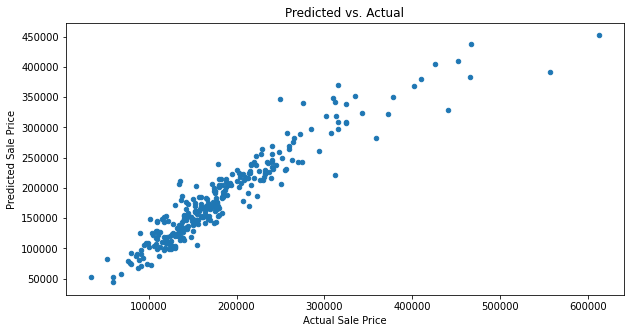

In [35]:
plt.figure(figsize=(10, 5))
plt.scatter(Y_test, Y_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

##Ridge

In [33]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train, Y_train)
Y_pred = ridge.predict(X_test)

r_square = metrics.r2_score(Y_test, Y_pred)
mse = metrics.mean_squared_error(Y_test, Y_pred)
mae = metrics.mean_absolute_error(Y_test, Y_pred)

print("R Square               : ", r_square)
print("Mean Squared Error     : ", mse)
print("Root Mean Squared Error: ", mse**(1/2))
print("Mean Absolute Error    : ", mae) 

R Square               :  0.8845441650958124
Mean Squared Error     :  751894079.9378026
Root Mean Squared Error:  27420.68707997308
Mean Absolute Error    :  18574.852786387808


Text(0, 0.5, 'Predicted Sale Price')

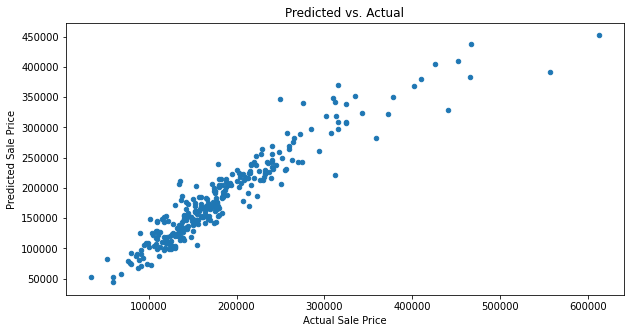

In [34]:
plt.figure(figsize=(10, 5))
plt.scatter(Y_test, Y_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

##LASSO

In [36]:
from sklearn.linear_model import Lasso

lass = Lasso()
lass.fit(X_train, Y_train)
Y_pred = lass.predict(X_test)

r_square = metrics.r2_score(Y_test, Y_pred)
mse = metrics.mean_squared_error(Y_test, Y_pred)
mae = metrics.mean_absolute_error(Y_test, Y_pred)
ev = metrics.explained_variance_score(Y_test, Y_pred)

print("R Square               : ", r_square)
print("Mean Squared Error     : ", mse)
print("Root Mean Squared Error: ", mse**(1/2))
print("Mean Absolute Error    : ", mae)

R Square               :  0.8836183632609578
Mean Squared Error     :  757923267.8034519
Root Mean Squared Error:  27530.40624116273
Mean Absolute Error    :  18608.481005583955


Text(0, 0.5, 'Predicted Sale Price')

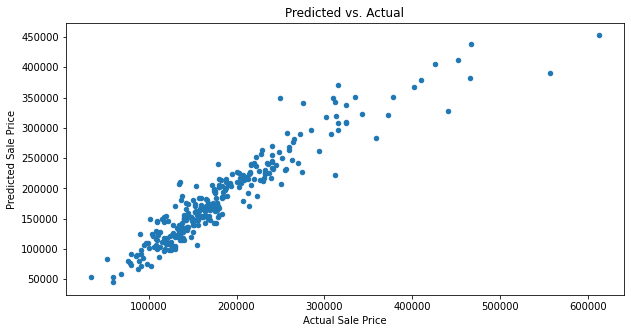

In [37]:
plt.figure(figsize=(10, 5))
plt.scatter(Y_test, Y_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

#Вывод

Все три алгоритма показали приблизительно одинаковую точность. Elastic дал результут немного хуже остальных приблизительно на 0.01. Наилучшие показатели у Ridge, его и возьмем для конечного результата 

In [47]:
submission = ridge.predict(test_df)

sub = pd.DataFrame()
sub['Id'] = Id
sub['SalePrice'] = submission
sub.to_csv('../data/submission.csv',index=False)
sub_df = pd.read_csv(r'../data/submission.csv')
sub_df

,Id,SalePrice
0,1461,150135.138107
1,1462,154055.775271
2,1463,206427.310133
3,1464,212898.805104
4,1465,213254.669129
...,...,...
1454,2915,114985.653260
1455,2916,91112.368849
1456,2917,198890.339261
1457,2918,158404.223898
